In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/storedata.csv")

In [ ]:
data.head()

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,UK,1544,Ella,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good
2,Skipton,UK,2039,Valentina,-2,12288,105,No,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad
3,Stratton,UK,2055,Antonia,7,17092,117,No,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad
4,Shepperton,UK,2141,Gabriel,7,11307,103,No,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad


In [ ]:
data.shape

(136, 19)

In [ ]:
data.columns

Index(['Town', 'Country', 'Store ID', 'Manager name', 'Staff', 'Floor Space',
       'Window', 'Car park', 'Demographic score', 'Location',
       '40min population', '30 min population', '20 min population',
       '10 min population', 'Store age', 'Clearance space',
       'Competition number', 'Competition score', 'Performance'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Town                136 non-null    object
 1   Country             136 non-null    object
 2   Store ID            136 non-null    int64 
 3   Manager name        136 non-null    object
 4   Staff               136 non-null    int64 
 5   Floor Space         136 non-null    int64 
 6   Window              136 non-null    int64 
 7   Car park            136 non-null    object
 8   Demographic score   136 non-null    int64 
 9   Location            136 non-null    object
 10  40min population    136 non-null    int64 
 11  30 min population   136 non-null    int64 
 12  20 min population   136 non-null    int64 
 13  10 min population   136 non-null    int64 
 14  Store age           136 non-null    int64 
 15  Clearance space     136 non-null    int64 
 16  Competition number  136 no

Categorical Features

*   Town
*   Country
*   Manager Name
*   Car Park
*   Location
*   Performance

In [ ]:
#Check for missing values
data.isnull().sum()

Town                  0
Country               0
Store ID              0
Manager name          0
Staff                 0
Floor Space           0
Window                0
Car park              0
Demographic score     0
Location              0
40min population      0
30 min population     0
20 min population     0
10 min population     0
Store age             0
Clearance space       0
Competition number    0
Competition score     0
Performance           0
dtype: int64

Data Analysis

In [ ]:
#Carry out a descriptive statistics of the data
data.describe()

,Store ID,Staff,Floor Space,Window,Demographic score,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score
count,136.000000,136.000000,136.000000,136.000000,136.000000,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,136.000000,136.000000,136.000000,136.000000
mean,52172.580882,13.352941,15024.095588,112.044118,14.463235,1.487374e+06,1.249870e+06,1.134533e+06,1.066118e+06,6.529412,262.426471,14.463235,14.808824
std,28725.990237,56.592439,2761.801921,6.884085,2.874944,2.804989e+05,2.160875e+05,1.490280e+05,8.884585e+04,2.815147,51.724288,2.895483,2.955258
min,1437.000000,-2.000000,10072.000000,100.000000,10.000000,1.030405e+06,1.000653e+06,1.000214e+06,1.000002e+06,2.000000,200.000000,10.000000,10.000000
25%,24707.250000,6.000000,12793.000000,106.750000,12.000000,1.254949e+06,1.057284e+06,1.012573e+06,1.005593e+06,4.000000,220.750000,12.000000,13.000000
50%,56011.500000,7.000000,14596.500000,111.000000,14.500000,1.516338e+06,1.214459e+06,1.077542e+06,1.033228e+06,6.000000,249.000000,15.000000,15.000000
75%,76870.500000,8.000000,17543.750000,118.000000,17.000000,1.696352e+06,1.396967e+06,1.203077e+06,1.090349e+06,9.000000,292.250000,17.000000,18.000000
max,99854.000000,600.000000,19869.000000,124.000000,19.000000,1.997044e+06,1.929089e+06,1.723395e+06,1.426533e+06,11.000000,408.000000,19.000000,19.000000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


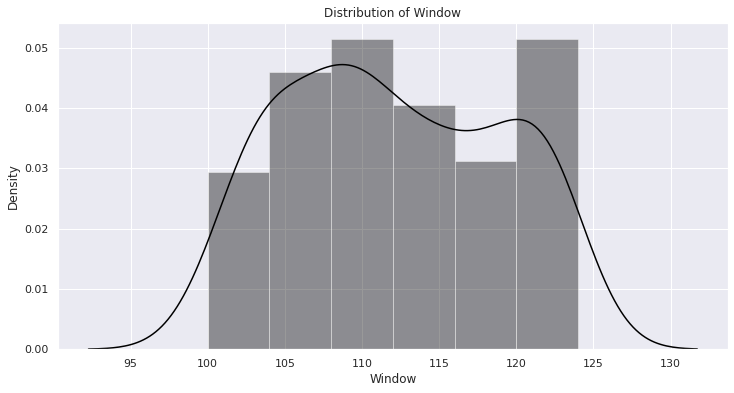

In [ ]:
#Weight distribution
sns.set()
plt.figure(figsize=(12,6))
sns.distplot(data.Window, color='black')
plt.title("Distribution of Window")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


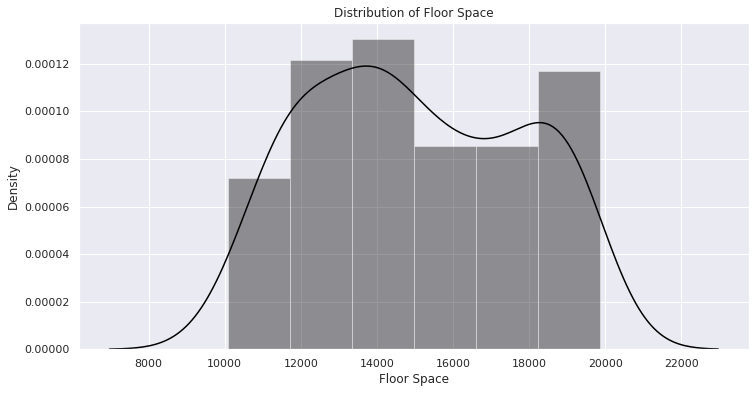

In [ ]:

plt.figure(figsize=(12,6))
sns.distplot(data['Floor Space'], color='black')
plt.title("Distribution of Floor Space")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


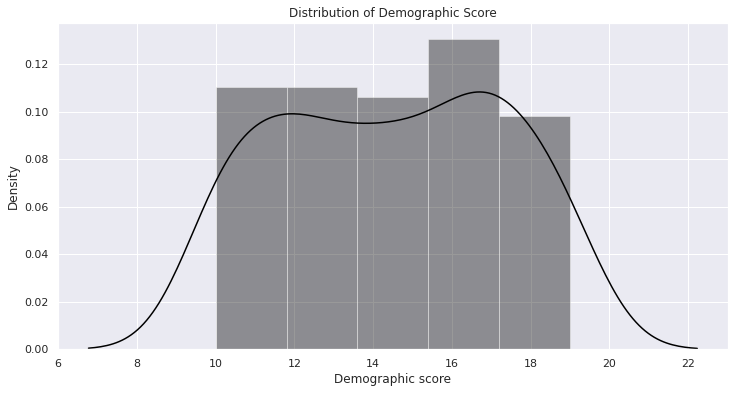

In [ ]:

plt.figure(figsize=(12,6))
sns.distplot(data['Demographic score'], color='black')
plt.title("Distribution of Demographic Score")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


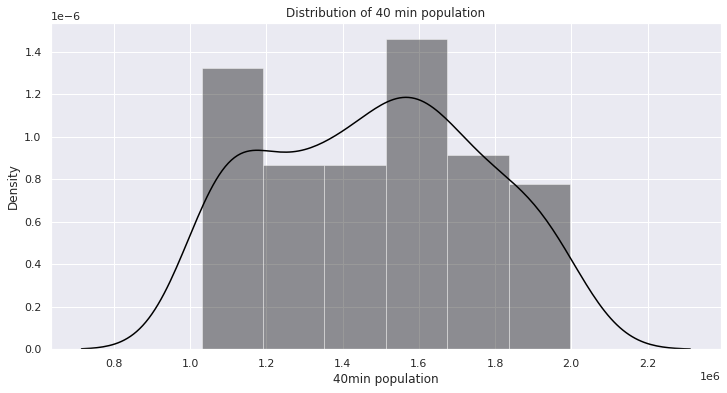

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(data['40min population'], color='black')
plt.title("Distribution of 40 min population")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


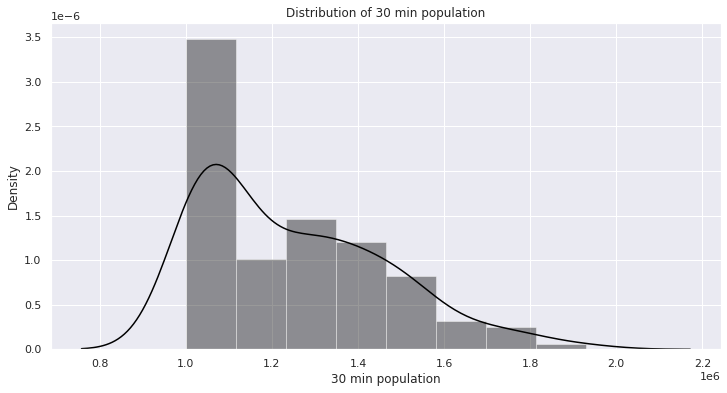

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(data['30 min population'], color='black')
plt.title("Distribution of 30 min population")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


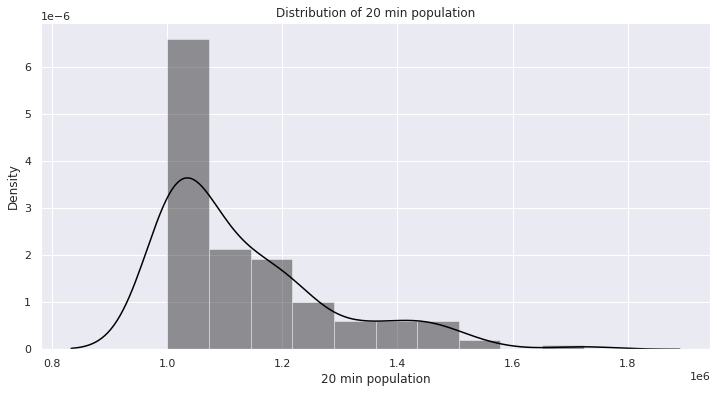

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(data['20 min population'], color='black')
plt.title("Distribution of 20 min population")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


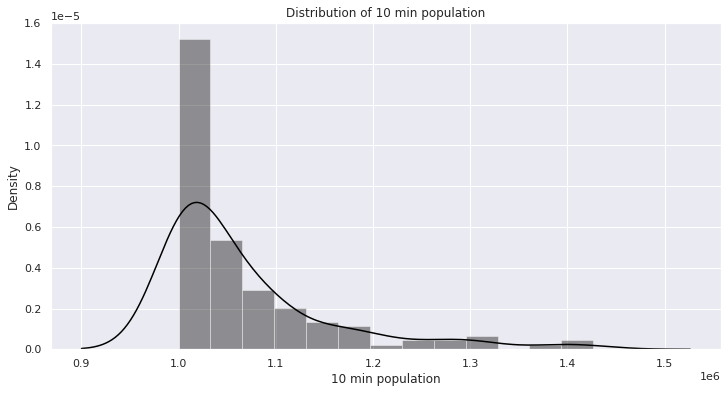

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(data['10 min population'], color='black')
plt.title("Distribution of 10 min population")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


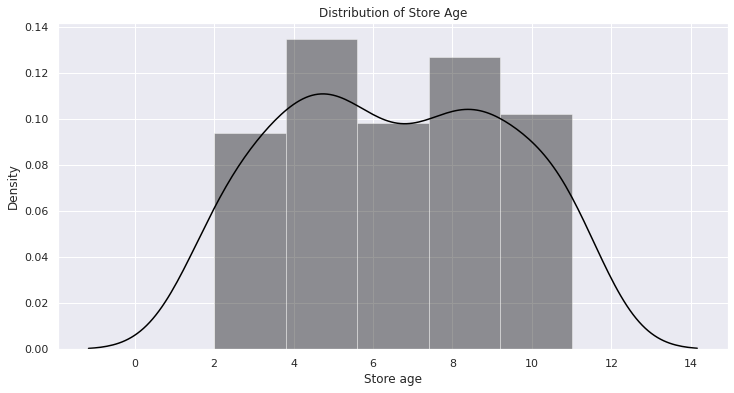

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(data['Store age'], color='black')
plt.title("Distribution of Store Age")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


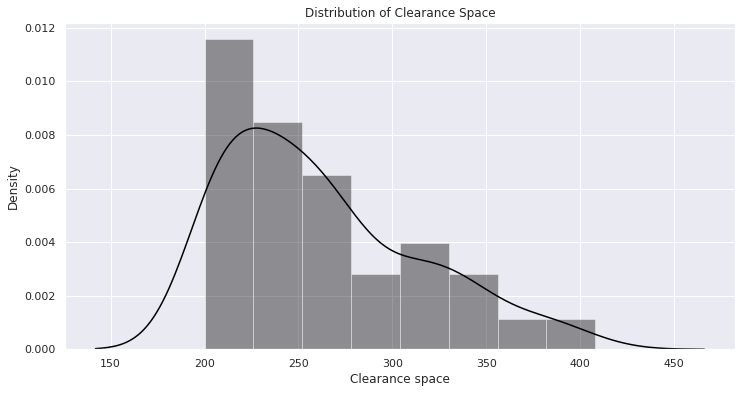

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(data['Clearance space'], color='black')
plt.title("Distribution of Clearance Space")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


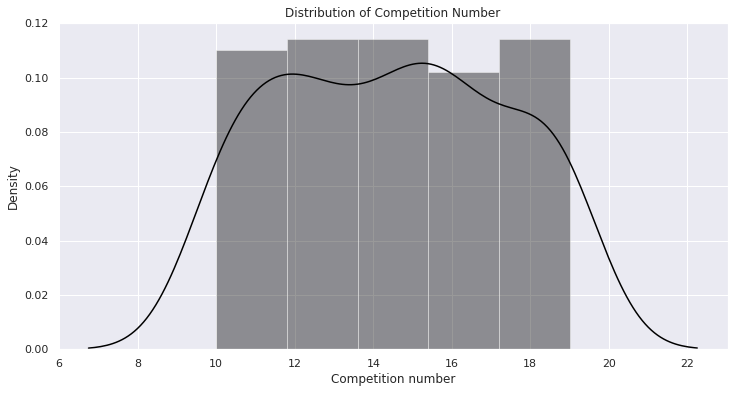

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(data['Competition number'], color='black')
plt.title("Distribution of Competition Number")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


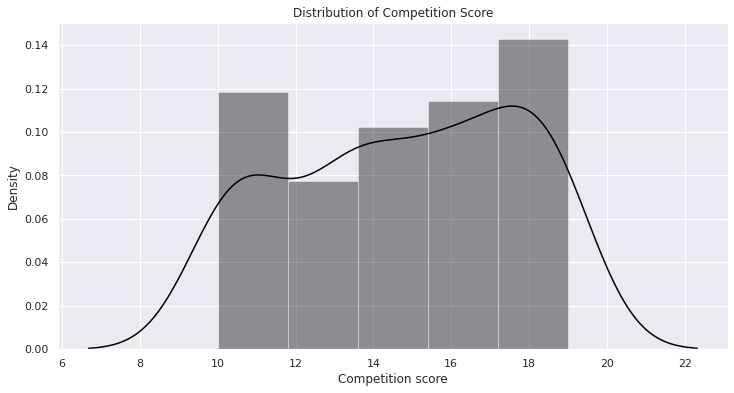

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(data['Competition score'], color='black')
plt.title("Distribution of Competition Score")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


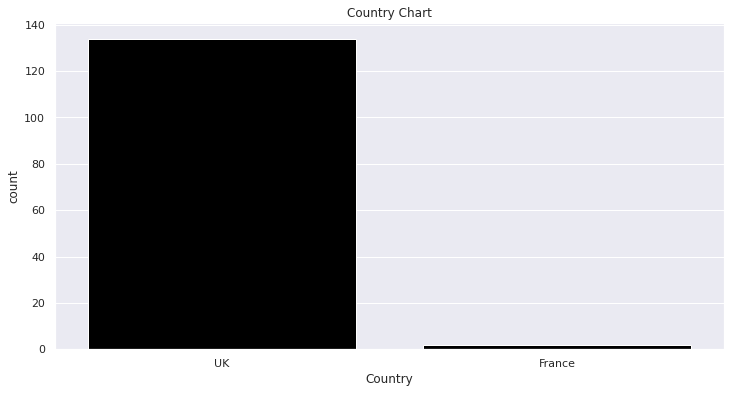

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data['Country'], color='black')
plt.title("Country Chart")
plt.show()

In [ ]:
data.Country.value_counts()

UK        134
France      2
Name: Country, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


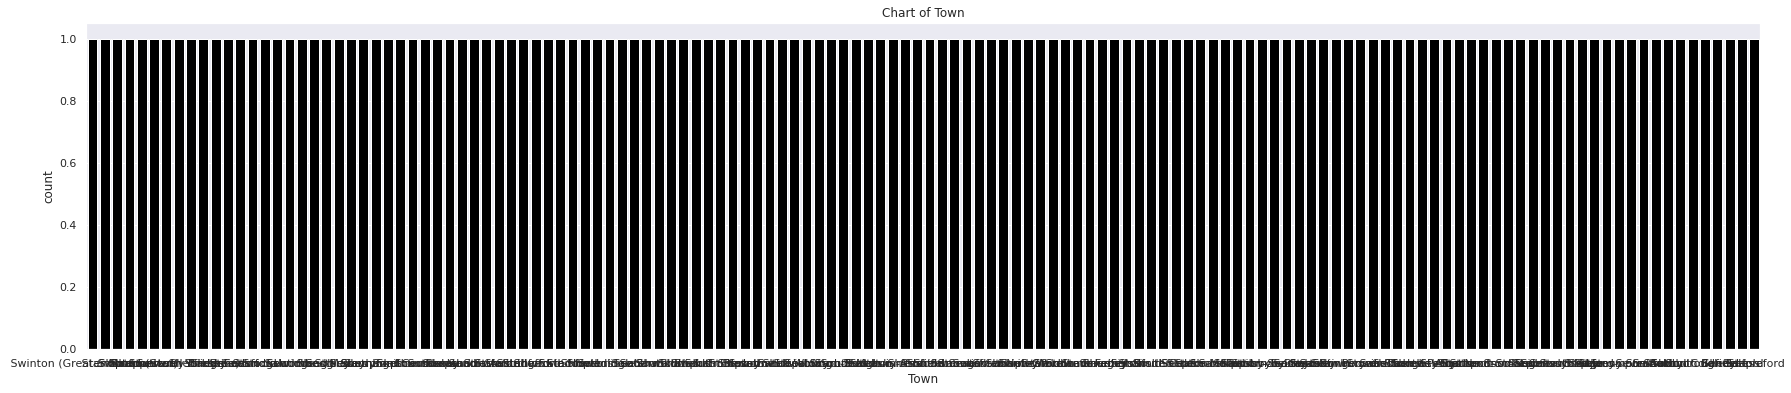

In [ ]:
plt.figure(figsize=(30,6))
sns.countplot(data['Town'], color='black')
plt.title("Chart of Town")
plt.show()

In [ ]:
data.Town.nunique()

136

In [ ]:
data.Town.value_counts()

 Swinton (Greater Manchester)    1
 Shoreham-by-Sea                 1
 South Cave                      1
 Settle                          1
 Sleaford                        1
                                ..
 Stainforth                      1
 Swindon                         1
 Stanford-le-Hope                1
 Shefford                        1
 Stapleford                      1
Name: Town, Length: 136, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


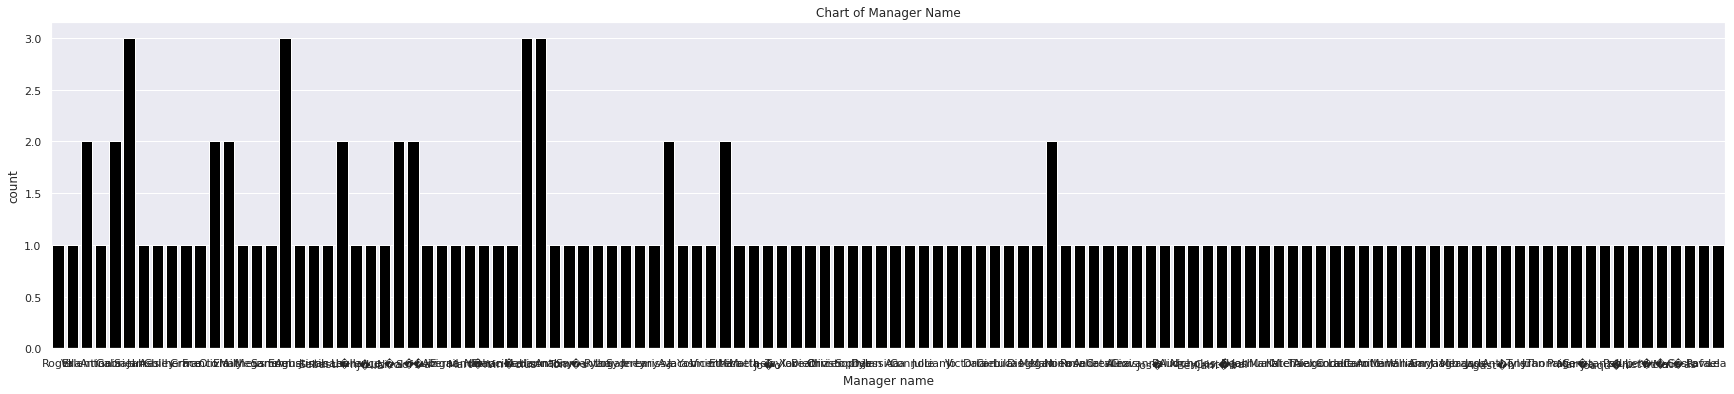

In [ ]:
plt.figure(figsize=(30,6))
sns.countplot(data['Manager name'], color='black')
plt.title("Chart of Manager Name")
plt.show()

In [ ]:
data['Manager name'].unique()

array(['Roger', 'Ella', 'Valentina', 'Antonia', 'Gabriel', 'Sarah',
       'James', 'Ashley', 'Guilherme', 'Grace', 'Franco', 'Olivia',
       'Emily', 'Matheus', 'Megane', 'Samuel', 'Emma', 'Agustina',
       'Justin', 'Sebasti�n', 'Isabella', 'Laurence', 'J�lia', 'Luc�a',
       'Nicol�s', 'Sof�a', 'Luiz', 'Abigail', 'Fernanda', 'Mart�n',
       'Nathan', 'Francisca', 'Vin�cius', 'Madison', 'Hannah', 'Antony',
       'Tom�s', 'Samantha', 'Ryan', 'Logan', 'Sydney', 'Jeremy',
       'Larissa', 'Ava', 'Jacob', 'Yasmin', 'Vicente', 'Ethan', 'Micaela',
       'Matthew', 'Jo�o', 'Taylor', 'Xavier', 'Beatriz', 'Olivier',
       'Christopher', 'Sophia', 'Dylan', 'Jessica', 'Ana', 'Connor',
       'Julie', 'Liam', 'Jo', 'Victoria', 'Daniel', 'Camila', 'Lucas',
       'Diego', 'Megan', 'Martina', 'Noemie', 'Rosalie', 'Andrew',
       'Catalina', 'Alexis', 'Giovanna', 'Jos�', 'Felix', 'Audrey',
       'Nicholas', 'Benjam�n', 'Crist�bal', 'Noah', 'Joshua', 'Maria',
       'Kate', 'Michael', 'Thi

In [ ]:
data['Manager name'].nunique()

118

In [ ]:
data['Manager name'].value_counts().head(30)

Sarah        3
Emma         3
Hannah       3
Madison      3
Olivia       2
Emily        2
Sof�a        2
Isabella     2
Ethan        2
Ava          2
Nicol�s      2
Martina      2
Gabriel      2
Valentina    2
Crist�bal    1
Michael      1
Kate         1
Maria        1
Thiago       1
Joshua       1
Noah         1
Alexander    1
Roger        1
Audrey       1
Benjam�n     1
Nicholas     1
Lautaro      1
Felix        1
Jos�         1
Giovanna     1
Name: Manager name, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


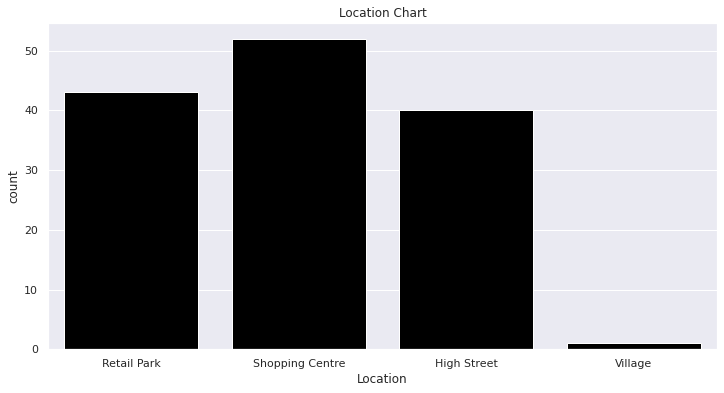

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data['Location'], color='black')
plt.title("Location Chart")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


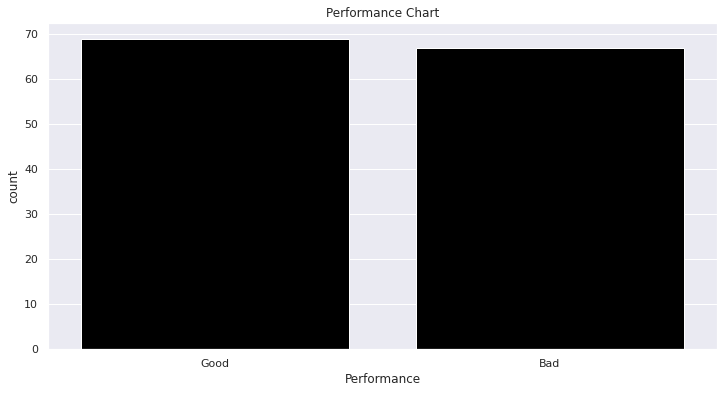

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data['Performance'], color='black')
plt.title("Performance Chart")
plt.show()

In [ ]:
data['Performance'].value_counts()

Good    69
Bad     67
Name: Performance, dtype: int64

Dealing with Skewed Data

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


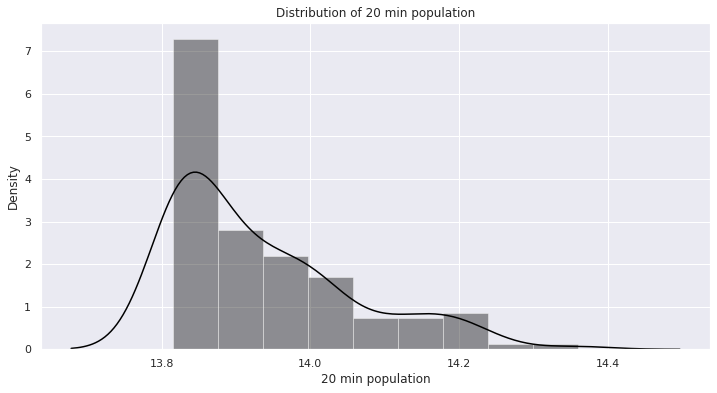

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(np.log(data['20 min population']), color='black')
plt.title("Distribution of 20 min population")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


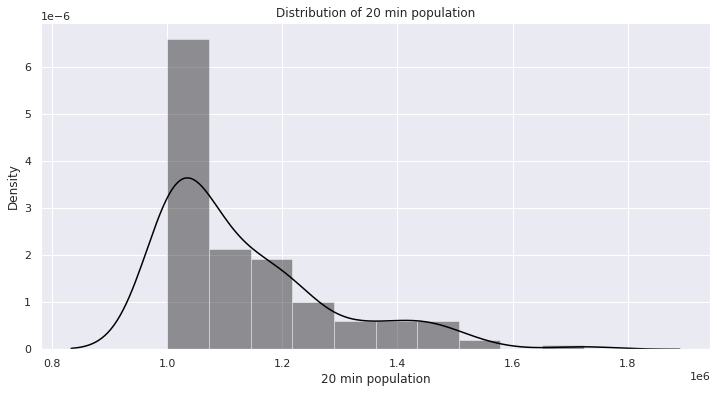

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(data['20 min population'], color='black')
plt.title("Distribution of 20 min population")
plt.show()

In [ ]:
data['20 min population'].skew()

1.3916620591816766

In [ ]:
np.log(data['20 min population']).skew()

1.1362125889266286

In [ ]:
data['20 min population']

0      1006986
1      1012182
2      1104490
3      1009496
4      1003137
        ...   
131    1141898
132    1378708
133    1200486
134    1127276
135    1159859
Name: 20 min population, Length: 136, dtype: int64

<AxesSubplot:>

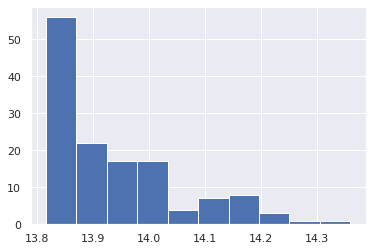

In [ ]:
np.log(data['20 min population']).hist()

<AxesSubplot:>

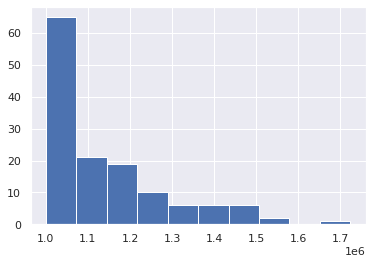

In [ ]:
data['20 min population'].hist()

<AxesSubplot:>

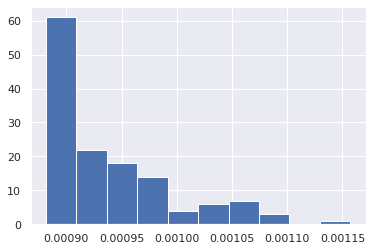

In [ ]:
(np.sqrt(data['20 min population'])/np.mean(data['20 min population'])).hist()

In [ ]:
((data['20 min population'])/np.mean(data['20 min population']))

NameError: ignored

In [ ]:
((data['20 min population'])/np.mean(data['20 min population'])).describe().plot(kind='bar')


NameError: ignored